In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(style="ticks")

In [2]:
df = pd.read_hdf('stored_data_THP1.h5')


In [3]:
df.keys()

Index([u'filename', u'labelchannel', u'max_chan1', u'max_chan2', u'max_chan3',
       u'max_chan4', u'mean_chan1', u'mean_chan2', u'mean_chan3',
       u'mean_chan4', u'median_chan1', u'median_chan2', u'median_chan3',
       u'median_chan4', u'series', u'stdev_chan1', u'stdev_chan2',
       u'stdev_chan3', u'stdev_chan4', u'threshold1', u'threshold2',
       u'threshold3', u'thresholdlabel', u'wavelength1', u'wavelength2',
       u'wavelength3', u'wavelength4'],
      dtype='object')

In [4]:
df.head()

,filename,labelchannel,max_chan1,max_chan2,max_chan3,max_chan4,mean_chan1,mean_chan2,mean_chan3,mean_chan4,...,stdev_chan3,stdev_chan4,threshold1,threshold2,threshold3,thresholdlabel,wavelength1,wavelength2,wavelength3,wavelength4
0,/home/jmamede/Area51/WorkAnalyze/pqbp1/2019072...,525,5.0,264.0,437.0,437.0,4.200,213.200000,330.200000,330.200000,...,55.206521,55.206521,100,150,275,275,679,597,525,435
1,/home/jmamede/Area51/WorkAnalyze/pqbp1/2019072...,525,4.0,207.0,440.0,440.0,3.000,167.166667,327.833333,327.833333,...,60.175900,60.175900,100,150,275,275,679,597,525,435
2,/home/jmamede/Area51/WorkAnalyze/pqbp1/2019072...,525,3.0,192.0,286.0,286.0,2.600,158.200000,280.800000,280.800000,...,3.655133,3.655133,100,150,275,275,679,597,525,435
3,/home/jmamede/Area51/WorkAnalyze/pqbp1/2019072...,525,4.0,259.0,358.0,358.0,2.625,177.000000,312.875000,312.875000,...,27.483802,27.483802,100,150,275,275,679,597,525,435
4,/home/jmamede/Area51/WorkAnalyze/pqbp1/2019072...,525,3.0,244.0,422.0,422.0,3.000,195.636364,334.272727,334.272727,...,49.563716,49.563716,100,150,275,275,679,597,525,435


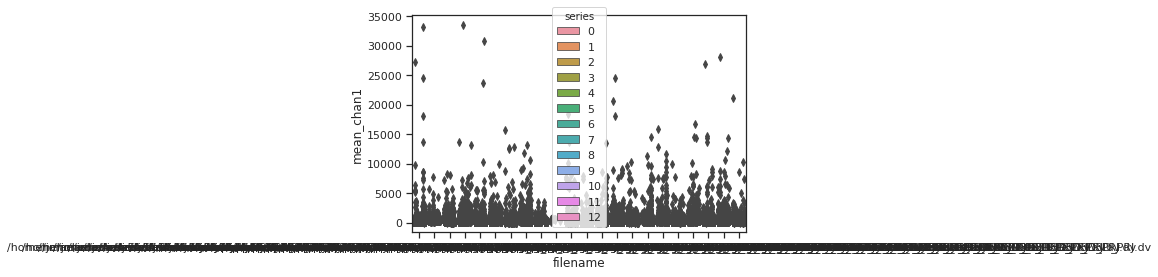

In [5]:

ax = sns.boxplot(x="filename",y="mean_chan1", hue='series',data=df)

In [18]:
df['well'] = df['filename'].str.slice(110,113)
df['threshold4'] = 550

In [19]:
df['chan1_boolean'] = df['max_chan1']  > 500
df['chan2_boolean'] = df['max_chan2']  > df['threshold2']
df['chan3_boolean'] = df['max_chan3']  > df['threshold3']
df['chan4_boolean'] = df['max_chan4']  > df['threshold4']

In [20]:
print len(df)
chan1_nb  = len(df[df['chan1_boolean'] ==True])
chan2_nb = len(df[df['chan2_boolean'] ==True])
chan3_nb = len(df[df['chan3_boolean'] ==True])
chan4_nb = len(df[df['chan4_boolean'] ==True])

#pqbp1 and S15 We dont care about these ones
dual_12 = np.logical_and(df['chan1_boolean'], df['chan2_boolean'])
print len(dual_12[dual_12 == True])
print len(dual_12[dual_12 == False])

#pqbp1 and (cGas or Nono)
dual_14 = np.logical_and(df['chan1_boolean'], df['chan4_boolean'])

#S15 and (cGas or Nono)
dual_24 = np.logical_and(df['chan2_boolean'], df['chan4_boolean'])

#What I want is the S15 negative  ~df['chan2_boolean']
#and then Pqbp1 and Cgas and Triple

#pqbp1 not S15
PQBP1 = np.logical_and(df['chan1_boolean'], ~df['chan2_boolean'])
#cGas not S15
cGas = np.logical_and(df['chan4_boolean'], ~df['chan2_boolean'])

#Pqbp1 and cGas not S15
Triple = np.logical_and(PQBP1,cGas)

334052
6036
328016


In [21]:
print len(df)
print len(df[PQBP1])
print len(df[cGas])
print len(df[Triple])
df[PQBP1].keys()

334052
3674
83318
2160


Index([u'filename', u'labelchannel', u'max_chan1', u'max_chan2', u'max_chan3',
       u'max_chan4', u'mean_chan1', u'mean_chan2', u'mean_chan3',
       u'mean_chan4', u'median_chan1', u'median_chan2', u'median_chan3',
       u'median_chan4', u'series', u'stdev_chan1', u'stdev_chan2',
       u'stdev_chan3', u'stdev_chan4', u'threshold1', u'threshold2',
       u'threshold3', u'thresholdlabel', u'wavelength1', u'wavelength2',
       u'wavelength3', u'wavelength4', u'well', u'threshold4',
       u'chan1_boolean', u'chan2_boolean', u'chan3_boolean', u'chan4_boolean'],
      dtype='object')

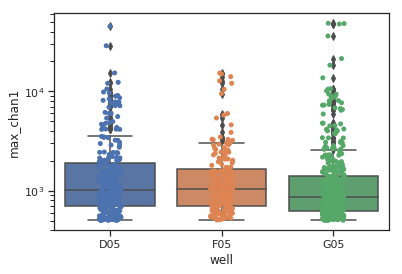

In [25]:
%matplotlib qt
inquestion = df[PQBP1]
labels = ['D05', 'F05', 'G05']
subset = inquestion.loc[inquestion['well'].isin(labels)]

#ax = sns.boxplot(x="well",y="mean_chan1", data=df[PQBP1])
ax = sns.stripplot(x="well",y="max_chan1", data=subset)
ax = sns.boxplot(x="well",y="max_chan1", data=subset)
ax.set_yscale('log')

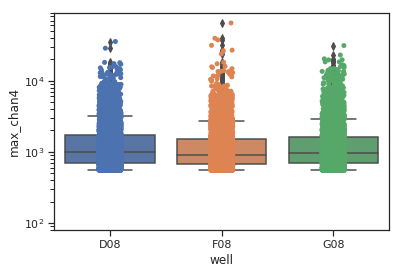

In [24]:
%matplotlib inline
inquestion = df[cGas]
labels = ['D08', 'F08', 'G08']
subset = inquestion.loc[inquestion['well'].isin(labels)]

#ax = sns.boxplot(x="well",y="mean_chan1", data=df[PQBP1])
ax = sns.stripplot(x="well",y="max_chan4", data=subset)
ax = sns.boxplot(x="well",y="max_chan4", data=subset)
ax.set_yscale('log')